In [1]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imutils.object_detection import non_max_suppression

C:\Users\ASUS\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
img=cv.imread(r"E:\Courses\Optical Character Recognition\Images\cup.jpg")

In [3]:
img=cv.cvtColor(img,cv.COLOR_BGR2RGB)

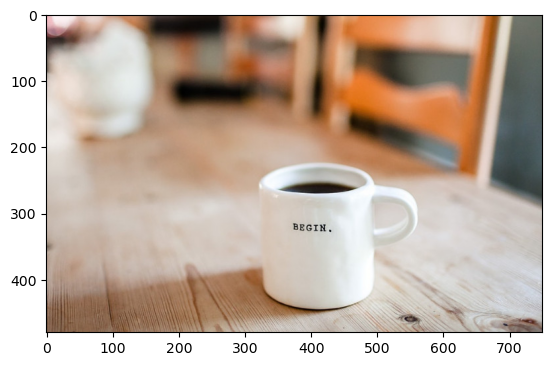

In [4]:
plt.imshow(img)

In [5]:
import pytesseract as pt

In [6]:
pt.image_to_string(img,lang='eng',config=f'--psm {12}')

'a\n\nBEGIN.\n\ni \\\n\ni\n'

In [7]:
width=img.shape[1]
height=img.shape[0]

In [8]:
H=320
W=320

In [9]:
proportion_W = W/ float(width)
proportion_H = H / float(height)

In [10]:
img_copy=cv.resize(img,(320,320))

In [11]:
net=cv.dnn.readNet(r'E:\Courses\Optical Character Recognition\Models\frozen_east_text_detection.pb')

In [12]:
layers_names=['feature_fusion/Conv_7/Sigmoid','feature_fusion/concat_3']

In [13]:
blob=cv.dnn.blobFromImage(img,1.0,(320,320),crop=False)

In [14]:
blob.shape

(1, 3, 320, 320)

In [15]:
net.setInput(blob)

In [16]:
scores,geometry=net.forward(layers_names)

In [17]:
scores.shape

(1, 1, 80, 80)

In [18]:
geometry.shape

(1, 5, 80, 80)

In [19]:
rows,columns=scores.shape[2:4]
min_confidence=0.9

In [20]:
boxes=[]
confidences=[]

In [21]:
def geometric_data(geometry, y):
  xData0 = geometry[0, 0, y]
  xData1 = geometry[0, 1, y]
  xData2 = geometry[0, 2, y]
  xData3 = geometry[0, 3, y]
  angles_data = geometry[0, 4, y]
  return angles_data, xData0, xData1, xData2, xData3

In [22]:
def geometric_calculation(angles_data, xData0, xData1, xData2, xData3):
  (offsetX, offsetY) = (x * 4.0, y * 4.0)
  angle = angles_data[x]
  cos = np.cos(angle)
  sin = np.sin(angle)
  h = xData0[x] + xData2[x]
  w = xData1[x] + xData3[x]

  endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
  endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))

  beginX = int(endX - w)
  beginY = int(endY - h)

  return beginX, beginY, endX, endY

In [23]:
for y in range(0, rows):
  data_scores = scores[0, 0, y]
  angles_data, xData0, xData1, xData2, xData3 = geometric_data(geometry, y)
  for x in range(0, columns):
    if data_scores[x] < min_confidence:
      continue  
    beginX, beginY, endX, endY = geometric_calculation(angles_data, xData0, xData1, xData2, xData3)
    confidences.append(data_scores[x])
    boxes.append((beginX, beginY, endX, endY))

In [24]:
detections=non_max_suppression(np.array(boxes),probs=confidences)

In [25]:
detections

array([[157, 208, 187, 220]])

In [26]:
blank=np.zeros((320,320))

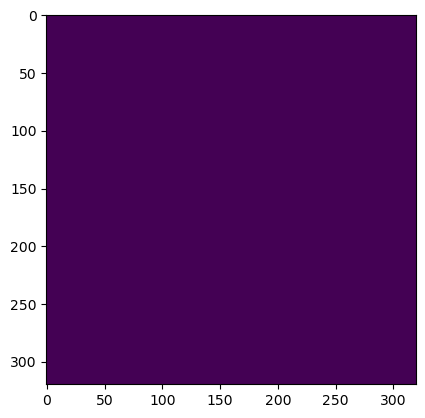

In [27]:
plt.imshow(blank)

In [28]:
rect=cv.rectangle(img_copy,(157,208),(187,220),(255,255,0),thickness=2)

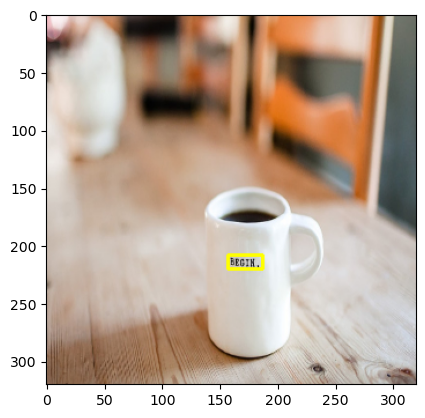

In [29]:
plt.imshow(rect)

In [30]:
roi=img_copy[208:220,157:187]

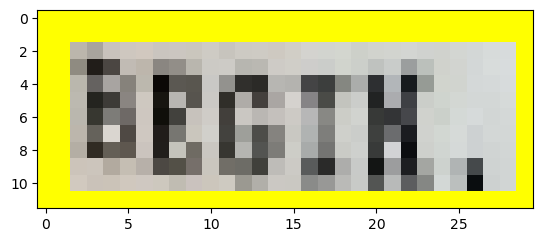

In [31]:
plt.imshow(roi)

In [32]:
text=pt.image_to_string(roi)

In [33]:
t=cv.putText(text=text,org=(157,200),img=rect,fontFace=cv.FONT_HERSHEY_PLAIN,fontScale=0.5,color=(255,0,0))

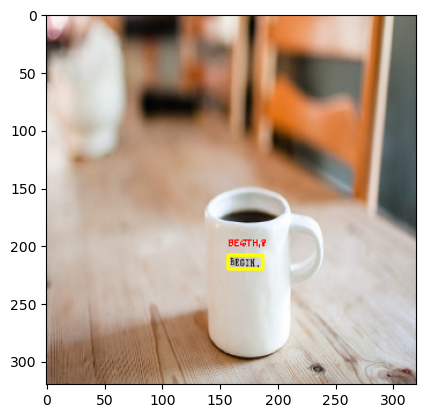

In [34]:
plt.imshow(t)